<a href="https://colab.research.google.com/github/Maiven/personal_kaggle/blob/main/kaggle_How_to_get_into_graduate_school_%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.kaggle.com/nilanml/how-to-get-into-graduate-school/notebook

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/input/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

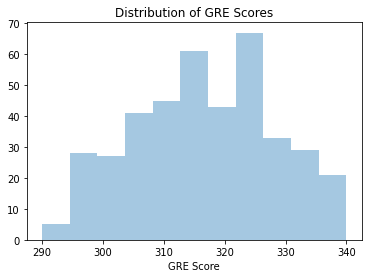

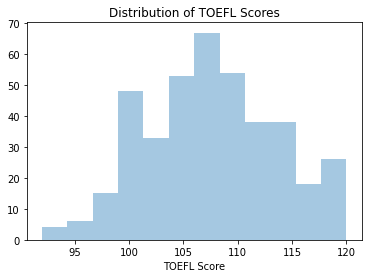

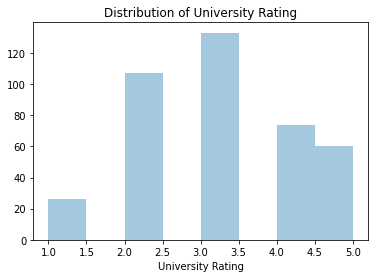

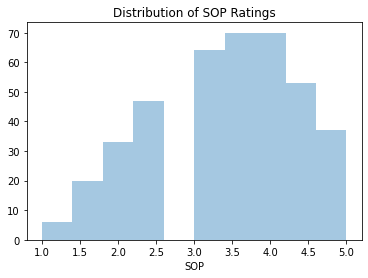

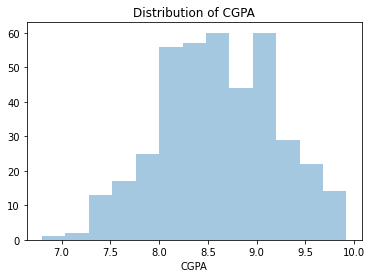

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

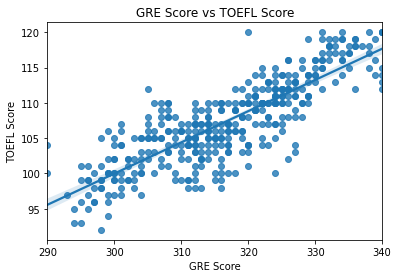

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

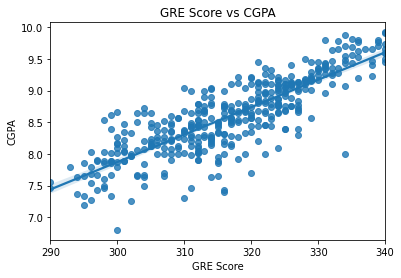

In [ ]:

fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

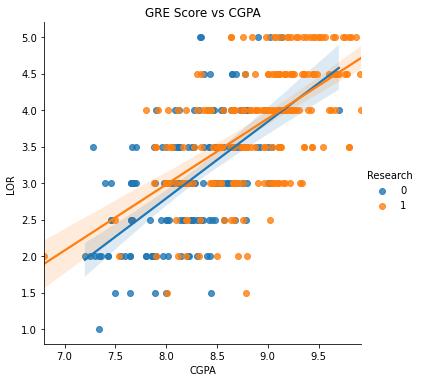

In [ ]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

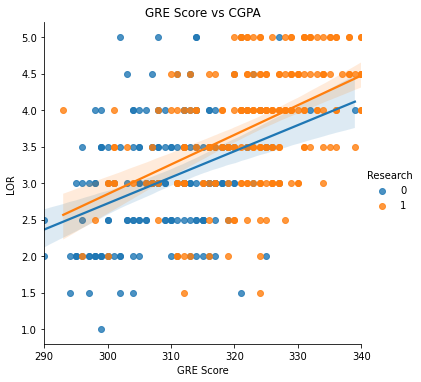

In [ ]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

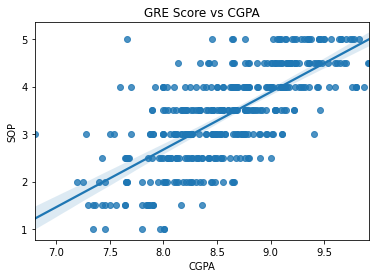

In [ ]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

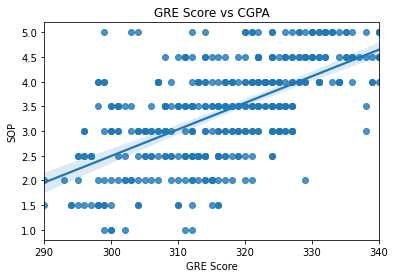

In [ ]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

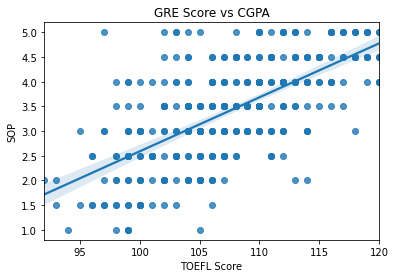

In [ ]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

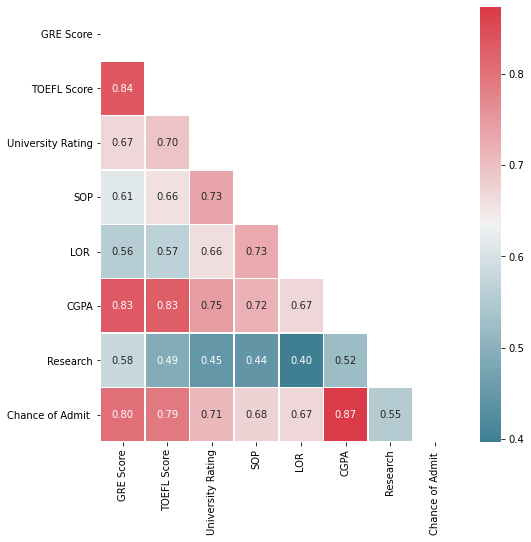

In [ ]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 55kB/s 


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Results...
DecisionTree : 0.09096702699330127
Linear Regression : 0.06473311695782082
RandomForest : 0.07117204419573742
KNeighbours : 0.083342291185208
SVM : 0.08180727044650482
AdaBoostClassifier : 0.08127917030816574
GradientBoostingClassifier:  0.06651758757195937
[07:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost:  0.0681331805795245
CatBoost:  0.07153086676897127
Lasso:  0.13137657075960432
Ridge:  0.06479970981992439
BayesianRidge:  0.06489639576721208
ElasticNet:  0.0980598738822262
HuberRegressor:  0.0688492948627345


In [ ]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)


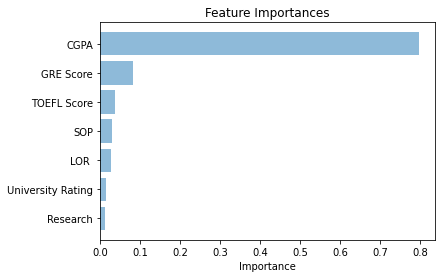

In [ ]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()